In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
import glob
import pymesh
from sklearn import decomposition

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("SVC with kernel rbf")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(int(round(cm[i, j],2)*100))+"%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Interpolando vertices

In [3]:
data = pd.read_csv("../../Datos/data_artificial_cites/landmarking_600f&m.csv",sep=",",header=0,index_col=0,nrows=450)
#data = pd.read_csv("../../Datos/data_artificial_cites/landmarks_reales.csv",sep=",",header=0,index_col=0)

In [4]:
data.columns

Index(['id', 'cloud_X', 'cloud_Y', 'cloud_Z', 'S000_X', 'S001_X', 'S002_X',
       'S003_X', 'S004_X', 'S005_X', 'S006_X', 'S007_X', 'S008_X', 'S009_X',
       'S010_X', 'S011_X', 'S012_X', 'S013_X', 'S014_X', 'S000_Y', 'S001_Y',
       'S002_Y', 'S003_Y', 'S004_Y', 'S005_Y', 'S006_Y', 'S007_Y', 'S008_Y',
       'S009_Y', 'S010_Y', 'S011_Y', 'S012_Y', 'S013_Y', 'S014_Y', 'S000_Z',
       'S001_Z', 'S002_Z', 'S003_Z', 'S004_Z', 'S005_Z', 'S006_Z', 'S007_Z',
       'S008_Z', 'S009_Z', 'S010_Z', 'S011_Z', 'S012_Z', 'S013_Z', 'S014_Z'],
      dtype='object')

In [5]:
ids = np.array(data['id'])
cloud_Xs = np.array(data['cloud_X'])
cloud_Ys = np.array(data['cloud_Y'])
cloud_Zs = np.array(data['cloud_Z'])
del data

In [6]:
def from_string(a):
    return np.fromstring(a,sep=" ")

In [7]:
Xs = np.array(list(map(lambda x: from_string(x),cloud_Xs)))
Ys = np.array(list(map(lambda x: from_string(x),cloud_Ys)))
Zs = np.array(list(map(lambda x: from_string(x),cloud_Zs)))
del cloud_Xs,cloud_Ys,cloud_Zs

In [8]:
shapes_Xs = np.array(list(map(lambda x: np.shape(x),Xs)))

In [9]:
min_shape = shapes_Xs.flatten().min()

In [10]:
min_shape

67290

In [11]:
def compl(a):
    #b = np.unique(np.random.randint(a.shape[0],size=100000))
    #return a[np.random.choice(b, 10000)]}
    return a[random.sample(range(a.shape[0]),min_shape)]

In [12]:
import random

In [13]:
values = np.array(list(map(lambda x: compl(np.column_stack((Xs[x],Ys[x],Zs[x]))),range(450))))
del Xs,Ys,Zs,shapes_Xs

In [14]:
ids_remove = np.array(["05-04-F","02-04-F"])

In [15]:
filtro = ids != "05-04-F"

In [16]:
filtro_1 = ids != "02-04-F"

In [17]:
filtro = filtro == filtro_1

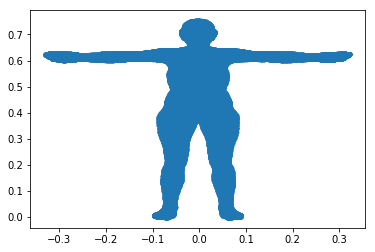

In [18]:
plt.plot(values[100][:,0],values[100][:,1],".")
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
values = np.array(list(map(lambda x: MinMaxScaler().fit_transform(x),values)))

In [21]:
values = values.reshape((values.shape[0],values.shape[1]*values.shape[2]))

In [22]:
values.shape

(450, 201870)

In [23]:
values = values[filtro]

In [24]:
values.shape

(448, 201870)

# Reducción de dimensionalidad PCA 

In [25]:
#pca = decomposition.PCA(n_components=350,svd_solver='randomized',whiten=True)
pca = decomposition.PCA(n_components=350,svd_solver='full',whiten=True)
pca.fit(values)
print("Con n_components = {} el valor es: {} ".format(400,pca.explained_variance_ratio_.sum()))

Con n_components = 400 el valor es: 0.803106730932998 


In [26]:
x_out = pca.transform(values)
x_out.shape

(448, 350)

In [27]:
pca.explained_variance_ratio_[0:2].sum()

0.013233896318751347

In [28]:
def sexo(x):
    if x.find('F') != -1:
        return 'F'
    else:
        return 'M'

In [29]:
sexo_ids = np.array(list(map(lambda x: sexo(x),ids))) 

In [30]:
sexo_ids=sexo_ids[filtro]

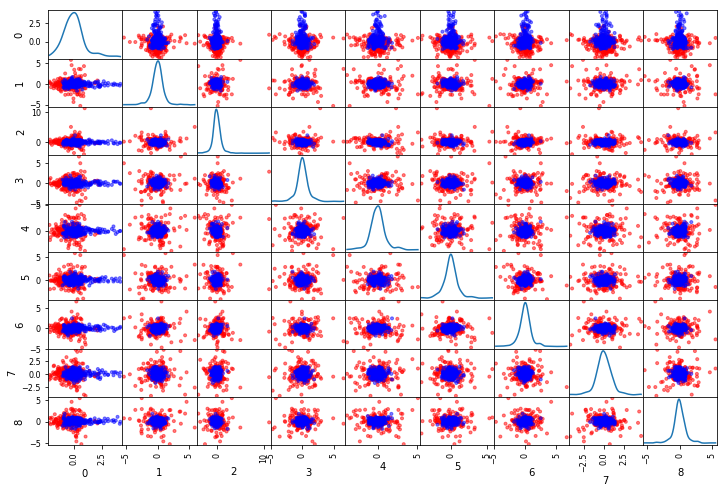

In [31]:
interest_feat = range(10)
data = pd.DataFrame(x_out)
data["labels"]= sexo_ids
color_wheel = {"F": "red", "M": "blue"}
colors = data["labels"].map(lambda x: color_wheel.get(x))
pd.scatter_matrix(data.loc[:,interest_feat[:-1]], figsize=(12,8), diagonal='kde',label=data.loc[:,"labels"],c=colors)
plt.show()

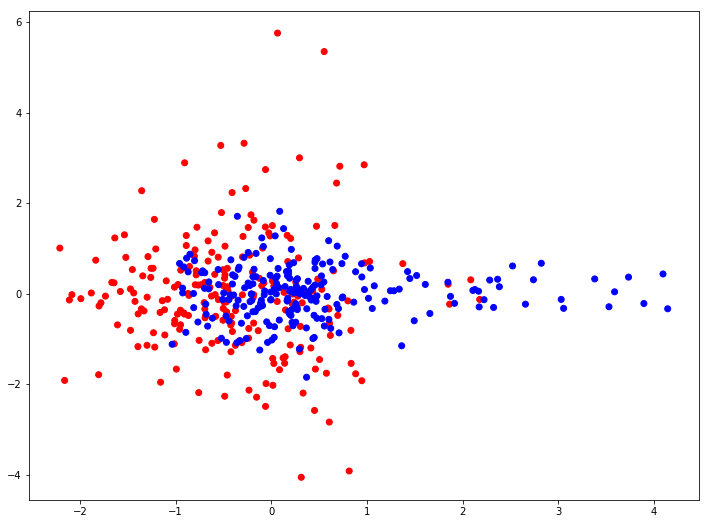

In [88]:
import matplotlib.patches as mpatches
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,5],marker="o",c=colors)
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

# Prediciendo

In [89]:
import sklearn
from sklearn.svm import SVC,LinearSVC

In [90]:
id_sexo = {"F": 0, "M": 1}
sexo_c = list(map(lambda x: id_sexo.get(x),sexo_ids))

In [91]:
X = x_out[:]
y = np.array(sexo_c)

In [92]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, test_size=0.25)

In [93]:
X = X_train
y = y_train

In [94]:
dttest_X = X_test
dttest_Y = y_test

In [95]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.metrics import classification_report
clf_tree = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features=97, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)
#y_pred = clf.predict(X_test)
#print(classification_report(y_test, y_pred))

In [96]:
clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.76      0.85        63
          1       0.76      0.96      0.85        49

avg / total       0.87      0.85      0.85       112



In [97]:
clf = SVC(kernel="rbf")

In [98]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    print("--- SVC Lineal ---")
    #print(clf.score(X_test,y_test))
    scores = cross_val_score(clf, X, y, cv=10)
    y_pred_1 = clf.predict(X_test)
    print(classification_report(y_test, clf.predict(X_test)))
    clf_tree.fit(X_train, y_train)
    print("--- Tree ---")
    y_pred = clf_tree.predict(X_test)
    scores = cross_val_score(clf_tree, X, y, cv=10)
    print(scores)
    print(classification_report(y_test, clf_tree.predict(X_test)))

--- SVC Lineal ---
             precision    recall  f1-score   support

          0       0.67      0.94      0.78        33
          1       0.91      0.57      0.70        35

avg / total       0.79      0.75      0.74        68

--- Tree ---
[ 0.88571429  0.88235294  0.85294118  0.79411765  0.97058824  0.90909091
  0.87878788  0.84848485  0.75757576  0.93939394]
             precision    recall  f1-score   support

          0       0.93      0.85      0.89        33
          1       0.87      0.94      0.90        35

avg / total       0.90      0.90      0.90        68

--- SVC Lineal ---
             precision    recall  f1-score   support

          0       0.64      0.78      0.70        32
          1       0.75      0.60      0.67        35

avg / total       0.70      0.69      0.68        67

--- Tree ---
[ 0.88571429  0.88235294  0.85294118  0.79411765  0.97058824  0.90909091
  0.87878788  0.84848485  0.75757576  0.93939394]
             precision    recall  f1-score   

In [99]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.85074626865671643

In [100]:
sklearn.metrics.precision_score(y_test, y_pred)

0.80487804878048785

In [101]:
sklearn.metrics.accuracy_score(y_test, y_pred_1)

0.71641791044776115

In [102]:
sklearn.metrics.precision_score(y_test, y_pred_1)

0.76666666666666672

In [103]:
import itertools
from sklearn.metrics import confusion_matrix

In [104]:
plt.rcParams["figure.figsize"] = (12,9)

In [115]:
plt.rcParams["font.size"] = 20

SVC with kernel rbf
[[ 0.68253968  0.31746032]
 [ 0.04081633  0.95918367]]


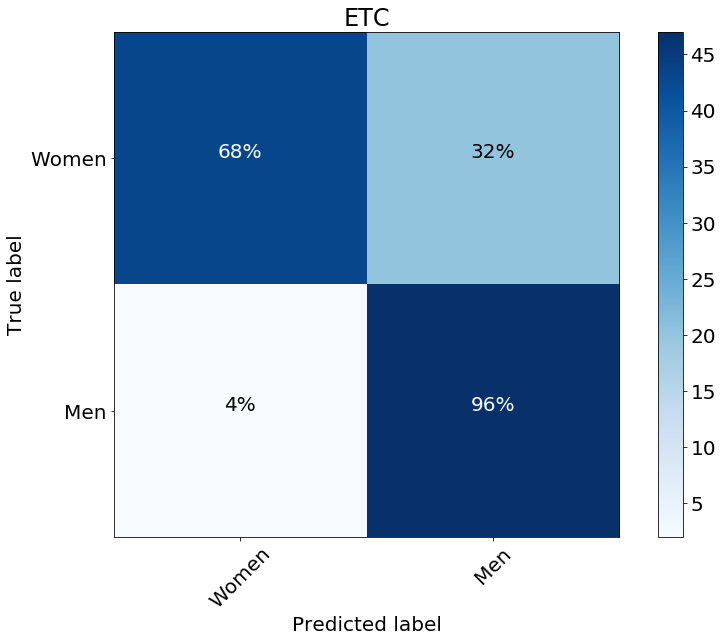

In [116]:
r1 = clf_tree.predict(dttest_X)
cnf_matrix = confusion_matrix(dttest_Y, r1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Women","Men"], normalize=True,
                      title='ETC')


plt.show()

SVC with kernel rbf
[[ 0.77777778  0.22222222]
 [ 0.30612245  0.69387755]]


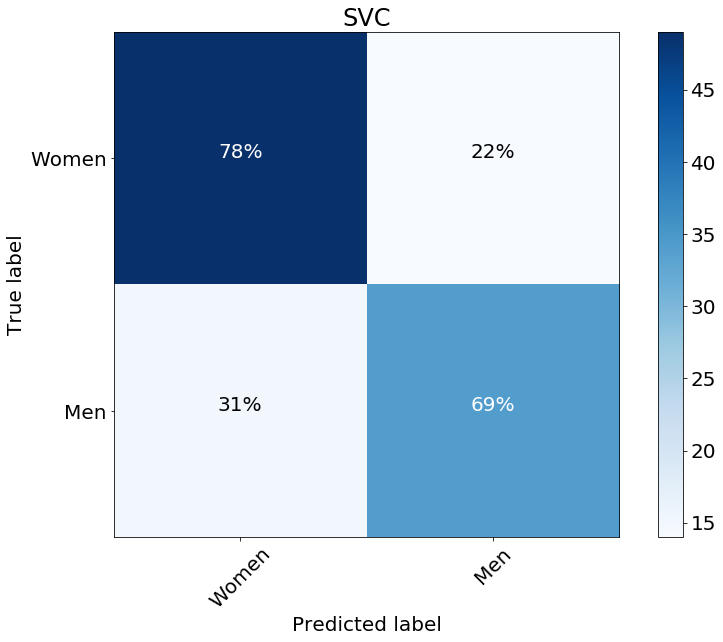

In [117]:
r1 = clf.predict(dttest_X)
cnf_matrix = confusion_matrix(dttest_Y, r1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Women","Men"], normalize=True,
                      title='SVC')


plt.show()

In [61]:
from sklearn.metrics import roc_curve, auc

In [68]:
y_score = clf.decision_function(dttest_X)

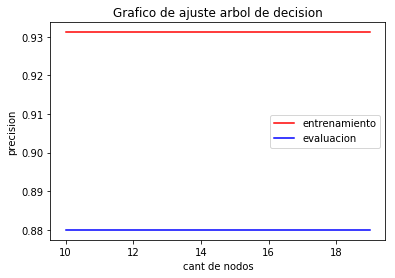

In [73]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(10,20))

for deep in max_deep_list:
#     arbol3 = ExtraTreesClassifier(n_estimators=10,
#                             max_features=None,
#                             #max_depth=4, #20
#                             random_state=1,
#                             max_depth=deep,
#                             n_jobs=-1)
    arbol3 = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features=97, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

In [110]:
from sklearn.model_selection import GridSearchCV

In [46]:

parameters = {'n_estimators': list(range(60,100)), 'max_features':range(2, 350), 'max_depth': list(range(1, 11))}
etc = ExtraTreesClassifier(random_state=1, n_jobs=-1)
clf = GridSearchCV(etc, parameters, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'max_features': range(2, 350), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [47]:
clf.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features=97, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [48]:
clf.best_params_

{'max_depth': 4, 'max_features': 97, 'n_estimators': 70}

In [49]:
clf.best_score_

0.8918032786885246

In [ ]:
""" ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features=97, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)"""

In [50]:
SVC?

In [111]:
parameters = {'kernel':["rbf","linear","poly"], 'C': [1, 10, 100, 1000]}
svc = SVC()
clf_svc = GridSearchCV(svc, parameters, n_jobs=-1)
clf_svc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kernel': ['rbf', 'linear', 'poly'], 'C': [1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [112]:
clf_svc.best_score_

0.71747211895910779

In [113]:
clf_svc.best_params_

{'C': 1, 'kernel': 'rbf'}